In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import scipy.stats as stats

In [18]:
df_BND_M20_analysis = pd.read_csv('../../dataset/BND_M20_analysis.csv')
df_BND_M20_analysis.head(10)

,Unnamed: 0,MCARE_RSLT_TYPE,OPRTN_YN,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,EDC_SBA,BTH_YYYY
0,0,5.0,0,1,30,3000,1921LE
1,1,5.0,0,2,60,6000,1921LE
2,2,5.0,0,1,30,3000,1921LE
3,3,1.0,0,1,7,4200,1921LE
4,4,5.0,0,1,7,1500,1921LE
5,5,5.0,0,1,3,6470,1921LE
6,6,1.0,0,1,30,3500,1921LE
7,7,1.0,0,1,0,5500,1921LE
8,8,1.0,0,1,0,67860,1921LE
9,9,1.0,0,1,30,4900,1921LE


In [19]:
df_BND_M20_analysis_01 = df_BND_M20_analysis[['MCARE_RSLT_TYPE', 'OPRTN_YN', 'VSHSP_DD_CNT', 'BTH_YYYY']]
df_BND_M20_analysis_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MCARE_RSLT_TYPE  4205 non-null   float64
 1   OPRTN_YN         4205 non-null   int64  
 2   VSHSP_DD_CNT     4205 non-null   int64  
 3   BTH_YYYY         4205 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 131.5+ KB


In [20]:
df_BND_M20_analysis_01.describe()

,MCARE_RSLT_TYPE,OPRTN_YN,VSHSP_DD_CNT
count,4205.000000,4205.000000,4205.000000
mean,1.899168,0.006421,1.214507
std,1.752071,0.240335,1.540333
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,9.000000,9.000000,37.000000


In [21]:
df_BND_M20_analysis_01.describe(include='object')

,BTH_YYYY
count,4205
unique,63
top,1940
freq,236


# 데이터 타입 변환

- 범주형: 진료결과구분 MCARE_RSLT_TYPE, 수술여부 OPRTN_YN
- 연속형: 입내원일수 VSHSP_DD_CNT, 출생년도 BTH_YYYY

In [24]:
df_BND_M20_analysis_01 =df_BND_M20_analysis_01[df_BND_M20_analysis_01['BTH_YYYY'] != '1921LE']

In [25]:
df_BND_M20_analysis_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 11 to 4204
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MCARE_RSLT_TYPE  4194 non-null   float64
 1   OPRTN_YN         4194 non-null   int64  
 2   VSHSP_DD_CNT     4194 non-null   int64  
 3   BTH_YYYY         4194 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 163.8+ KB


In [26]:
df_BND_M20_analysis_01.isnull().sum()

MCARE_RSLT_TYPE    0
OPRTN_YN           0
VSHSP_DD_CNT       0
BTH_YYYY           0
dtype: int64

In [27]:
df_BND_M20_analysis_01[['MCARE_RSLT_TYPE', 'OPRTN_YN']] = df_BND_M20_analysis_01[['MCARE_RSLT_TYPE', 'OPRTN_YN']].astype(object)

In [28]:
df_BND_M20_analysis_01['BTH_YYYY'] = df_BND_M20_analysis_01['BTH_YYYY'].astype(int)

In [29]:
df_BND_M20_analysis_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 11 to 4204
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MCARE_RSLT_TYPE  4194 non-null   object
 1   OPRTN_YN         4194 non-null   object
 2   VSHSP_DD_CNT     4194 non-null   int64 
 3   BTH_YYYY         4194 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 147.4+ KB


# EDA 상관관계 확인 

- 목표변수:진료결과구분 MCARE_RSLT_TYPE
- 설명변수:입내원일수 VSHSP_DD_CNT, 출생년도 BTH_YYYY, 수술여부 OPRTN_YN

    - 입내원일수 VSHSP_DD_CNT
    - 출생년도 BTH_YYYY
    - 수술여부 OPRTN_YN

# 단일 변수 시각화 

- 단일변수 / 연속형 - histplot: 입내원일수 VSHSP_DD_CNT, 출생년도 BTH_YYYY
- 단일변수 / 범주형 - barplot: 진료결과구분 MCARE_RSLT_TYPE, 수술여부 OPRTN_YN

In [32]:
# 단일변수 / 연속형 - histplot: 입내원일수 VSHSP_DD_CNT, 출생년도 BTH_YYYY
BND_M20_continuous_list = df_BND_M20_analysis_01[['VSHSP_DD_CNT', 'BTH_YYYY']].describe().columns.to_list()
BND_M20_continuous_list

['VSHSP_DD_CNT', 'BTH_YYYY']

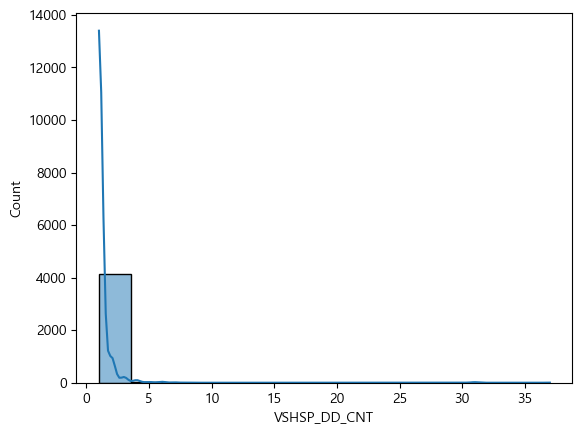

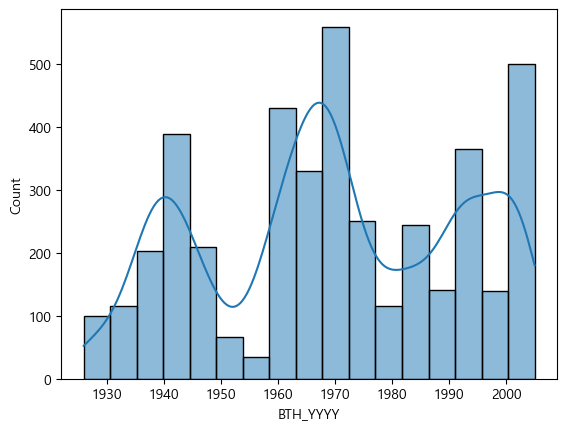

In [33]:
for item in BND_M20_continuous_list : 
    sns.histplot(data=df_BND_M20_analysis_01, x=item, kde=True)
    plt.show()

In [36]:
# 단일변수 / 범주형 - barplot: 진료결과구분 MCARE_RSLT_TYPE, 수술여부 OPRTN_YN
BND_M20_category_list = df_BND_M20_analysis_01[['MCARE_RSLT_TYPE', 'OPRTN_YN']].describe().columns.to_list()
BND_M20_category_list

['MCARE_RSLT_TYPE', 'OPRTN_YN']

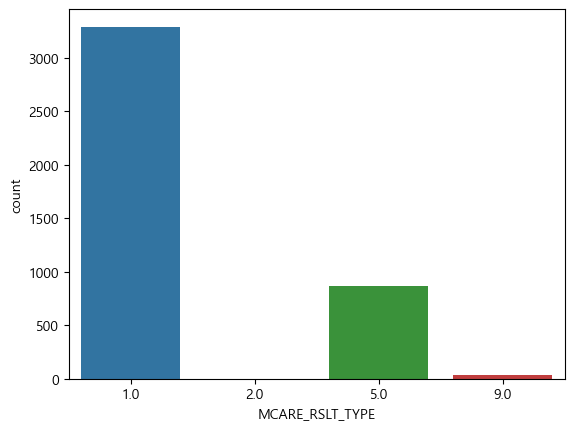

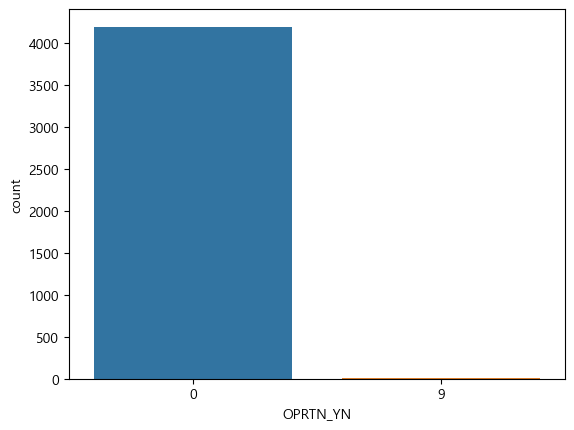

In [37]:
for item in BND_M20_category_list :
    sns.countplot(data=df_BND_M20_analysis_01, x=item)
    plt.show()

# 변수간 다변수 시각화 

- 연속형-범주형: barplot
        진료결과구분 MCARE_RSLT_TYPE - 출생년도 BTH_YYYY
        진료결과구분 MCARE_RSLT_TYPE - 입내원일수 VSHSP_DD_CNT
    
- 범주형-범주형: barplot
        진료결과구분 MCARE_RSLT_TYPE - 수술여부 OPRTN_YN

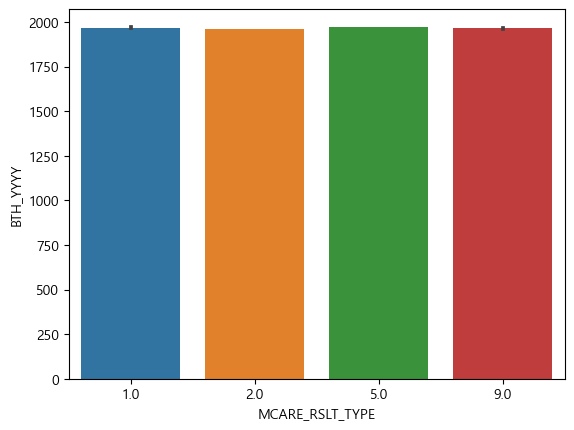

In [45]:
# 연속형-범주형: barplot 진료결과구분 MCARE_RSLT_TYPE - 출생년도 BTH_YYYY
sns.barplot(data=df_BND_M20_analysis_01, y='BTH_YYYY', x='MCARE_RSLT_TYPE')
plt.show()

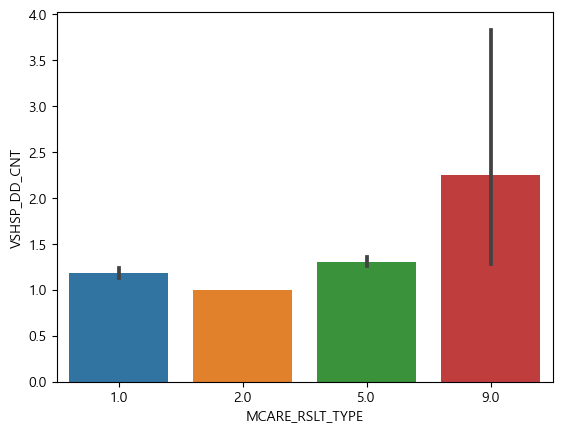

In [44]:
# 연속형-범주형: barplot 진료결과구분 MCARE_RSLT_TYPE - 입내원일수 VSHSP_DD_CNT
sns.barplot(data=df_BND_M20_analysis_01, y='VSHSP_DD_CNT', x='MCARE_RSLT_TYPE')
plt.show()

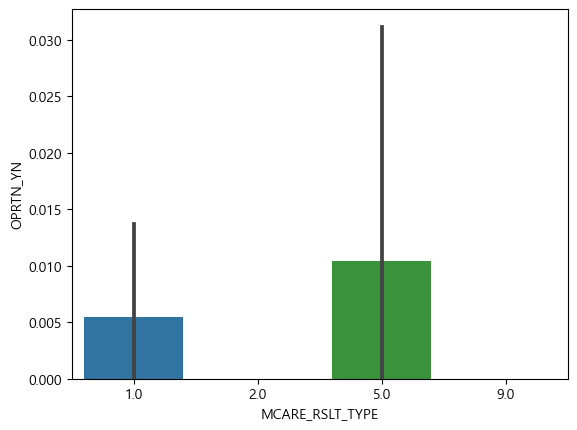

In [48]:
# 범주형-범주형: barplot 진료결과구분 MCARE_RSLT_TYPE - 수술여부 OPRTN_YN
sns.barplot(data=df_BND_M20_analysis_01, y='OPRTN_YN', x='MCARE_RSLT_TYPE')
plt.show()